<a href="https://colab.research.google.com/github/JoaoPedro-repertoriodeexatas/PS_Ligia_Time-06/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (EDA) - Triagem de Emergência (KTAS)

Esta análise exploratória de dados foca na avaliação do sistema de triagem **KTAS (Korean Triage and Acuity Scale)** em um departamento de emergência, buscando adaptá-los a métricas brasileiras na classificação. O conjunto de dados contém informações demográficas, sinais vitais, queixas principais e a classificação de risco atribuída tanto por enfermeiros quanto por especialistas.

A triagem é um processo crítico para garantir que pacientes com condições de risco de vida recebam atendimento prioritário. Este notebook investiga a consistência das classificações, a prevalência de erros (sub e superestimativa de risco), a influência de fatores como superlotação e a correlação entre sinais clínicos e o desfecho do atendimento.

## 1. Objetivos


O objetivo principal deste estudo é entender a dinâmica do atendimento de emergência e a eficácia do processo de triagem. Especificamente, buscamos:

1.  **Perfil Demográfico e Clínico:** Analisar a distribuição de idade, gênero e sinais vitais dos pacientes atendidos.
2.  **Avaliação da Triagem (KTAS):** Comparar a classificação de risco realizada por enfermeiros (`KTAS_RN`) com o padrão-ouro de especialistas (`KTAS_expert`) para identificar taxas de concordância.
3.  **Análise de Erros:** Investigar a ocorrência de erros de triagem (*mistriage*), identificando padrões de super-triagem (classificar como mais grave que o real) e sub-triagem (menos grave que o real).
4.  **Impacto do Fluxo:** Avaliar como a lotação do departamento (`Patients number per hour`) impacta a precisão da triagem.
5.  **Correlações Clínicas:** Explorar relações entre variáveis vitais (Pressão Arterial, Frequência Cardíaca, Dor) e o nível de urgência atribuído.
6.  **Desfechos:** Relacionar a gravidade inicial classificada com o tempo de permanência e o desfecho final (Alta, Internação, Óbito).

## 2. Dicionário de Variáveis e Tratamento de Dados


Abaixo está a descrição completa das variáveis, incluindo todas as transformações, renomeações e criações de novas categorias realizadas durante a etapa de pré-processamento.

### **Variáveis Categóricas Originais (Mapeadas)**
As variáveis originais codificadas numericamente foram mapeadas para rótulos legíveis:

*   **`Sexo_legenda`** (Origem: `Sex`)
    *   `Feminino` (1)
    *   `Masculino` (2)

*   **`Ferimento_legenda`** (Origem: `Injury` - Presença de ferimento físico)
    *   `Não` (1)
    *   `Sim` (2)

*   **`Dor_legenda`** (Origem: `Pain` - Queixa de dor na triagem)
    *   `Não` (0)
    *   `Sim` (1)

*   **`Estado_Mental_legenda`** (Origem: `Mental` - Escala AVPU)
    *   `Alerta` (1)
    *   `Responde à Voz` (2)
    *   `Responde à Dor` (3)
    *   `Sem Resposta` (4)

*   **`Tipo_Hospital_legenda`** (Origem: `Group`)
    *   `Local (3º Grau)` (1)
    *   `Regional (4º Grau)` (2)

*   **`Modo_Chegada_legenda`** (Origem: `Arrival mode`)
    *   `Caminhando` (1)
    *   `Ambulância Pública` (2)
    *   `Veículo Privado` (3)
    *   `Ambulância Privada` (4)
    *   `Outros` (Qualquer outro valor)

*   **`Desfecho_legenda`** (Origem: `Disposition`)
    *   `Alta` (1 e 4)
    *   `Internação (Enfermaria)` (2)
    *   `Internação (UTI)` (3)
    *   `Transferência` (5)
    *   `Óbito` (6)
    *   `Cirurgia` (7)

---

### **2. Variáveis Numéricas (Sinais Vitais)**
Os dados numéricos foram limpos (correção de decimais) e imputados pela mediana quando nulos:

*   **`Age`**: Idade do paciente (anos).
*   **`SBP`**: Pressão Arterial Sistólica (mmHg).
*   **`DBP`**: Pressão Arterial Diastólica (mmHg).
*   **`HR`**: Frequência Cardíaca (bpm).
*   **`RR`**: Frequência Respiratória (rpm).
*   **`BT`**: Temperatura Corporal (°C).
*   **`Saturation`**: Saturação de Oxigênio (%).
*   **`NRS_pain`**: Escala Numérica de Dor (0 a 10).
*   **`Patients number per hour`**: Número de pacientes chegando na mesma hora.
*   **`KTAS duration_min`**: Duração da triagem em minutos.
*   **`Length of stay_min`**: Tempo total de permanência no hospital em minutos.

---

### **3. Novas Variáveis Criadas (Categorização Clínica)**
Novas colunas foram geradas aplicando regras de negócio e protocolos clínicos (SBC, Manchester, etc.) sobre os dados numéricos:

#### **A. Sinais Vitais Classificados**
*   **`Categoria_Pressao`** (Baseado em `SBP` e `DBP` - Diretriz SBC)
    *   `Normal`: PAS < 120 e PAD < 80
    *   `Pré-hipertensão`: PAS 120-139 ou PAD 80-89
    *   `Hipertensão Estágio 1`: PAS 140-159 ou PAD 90-99
    *   `Hipertensão Estágio 2`: PAS 160-179 ou PAD 100-109
    *   `Hipertensão Estágio 3`: PAS ≥ 180 ou PAD ≥ 110

*   **`Categoria_FC`** (Baseado em `HR`)
    *   `Bradicardia`: < 60 bpm
    *   `Normal`: 60 a 100 bpm
    *   `Taquicardia`: > 100 bpm

*   **`Categoria_FR`** (Baseado em `RR`)
    *   `Bradipneia`: < 12 rpm
    *   `Normal`: 12 a 20 rpm
    *   `Taquipneia`: > 20 rpm

*   **`Categoria_Temperatura`** (Baseado em `BT`)
    *   `Hipotermia`: < 35.0°C
    *   `Normal`: 35.0°C a 37.2°C
    *   `Estado Febril`: 37.3°C a 37.7°C
    *   `Febre`: ≥ 37.8°C

*   **`Categoria_Saturacao`** (Baseado em `Saturation`)
    *   `Hipoxemia Grave`: < 86%
    *   `Hipoxemia Moderada`: 86% a 90%
    *   `Hipoxemia Leve`: 91% a 94%
    *   `Normal`: ≥ 95%

#### **B. Perfil do Paciente e Fluxo**
*   **`Idade_Categoria`** (Baseado em `Age`)
    *   `Adolescente`: < 18 anos
    *   `Adulto`: 18 a 59 anos
    *   `Idoso`: ≥ 60 anos

*   **`Dor_Nivel`** (Baseado em `NRS_pain`)
    *   `Sem Dor`: 0
    *   `Dor Leve`: 1 a 3
    *   `Dor Moderada`: 4 a 6
    *   `Dor Intensa`: 7 a 10

*   **`Permanencia_Categoria`** (Baseado em `Length of stay_min`)
    *   `Curta (até 6h)`: < 360 min
    *   `Média (6h-24h)`: 360 a 1439 min
    *   `Internação (>24h)`: ≥ 1440 min

*   **`Triagem_Velocidade`** (Baseado em `KTAS duration_min`)
    *   `Rápida`: < 3 min
    *   `Padrão`: 3 a 7 min
    *   `Demorada`: > 7 min

*   **`Fluxo_Categoria`** (Baseado em `Patients number per hour`)
    *   `Fluxo Baixo`: < 5 pacientes/h
    *   `Fluxo Médio`: 5 a 10 pacientes/h
    *   `Superlotado`: > 10 pacientes/h

#### **C. Avaliação da Triagem (Target e Erros)**
*   **`KTAS_Enfermeiro_classe`** (Agrupamento binário do `KTAS_RN`)
    *   `Emergência`: Níveis 1, 2, 3
    *   `Não Urgente`: Níveis 4, 5

*   **`KTAS_Especialista_classe`** (Agrupamento binário do `KTAS_expert`)
    *   `Emergência`: Níveis 1, 2, 3
    *   `Não Urgente`: Níveis 4, 5

*   **`Erro_Tipo_Triagem`** (Baseado em `mistriage`)
    *   `Correto` (0): Enfermeiro e Especialista concordaram.
    *   `Sub-triagem` (1): Enfermeiro classificou como menos grave que o Real.
    *   `Super-triagem` (2): Enfermeiro classificou como mais grave que o Real.

*   **`Erro_Desvio_Magnitude`** (Baseado em `Error_group` - distância entre níveis)
    *   `Sem Desvio`: Diferença = 0
    *   `Desvio Leve`: Diferença de 1 ou 2 níveis
    *   `Desvio Grave`: Diferença > 2 níveis

    ** Os critérios de classificação foram:

    Pressão Arterial: Diretrizes Brasileiras de Hipertensão Arterial – 2020/2024 (Sociedade Brasileira de Cardiologia - SBC).Idade (Idoso ≥ 60 anos): Lei nº 10.741/2003 (Estatuto da Pessoa Idosa - Legislação Brasileira).Nível de Dor (Escala NRS): Escada Analgésica da OMS (Organização Mundial da Saúde) e IASP (Associação Internacional para o Estudo da Dor).Saturação de Oxigênio ($SpO_2$): Diretrizes de Oxigenoterapia da Sociedade Brasileira de Pneumologia e Tisiologia (SBPT).Sinais Vitais (FC, FR, Temperatura): Parâmetros de Semiologia Médica (Porto & Porto) e Protocolos de Triagem do Ministério da Saúde (Acolhimento com Classificação de Risco).Classificação KTAS: Critérios definidos na documentação original do dataset (baseado no Canadian Triage and Acuity Scale).

## 3. Carregar dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Configuração Estética (Storytelling Visual)
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

# Visualização inicial
display(df.head())
print(f"Dimensões do Dataset: {df.shape}")

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,Categoria_Saturacao,Idade_Categoria,Dor_Nivel,Erro_Tipo_Triagem,Erro_Desvio_Magnitude,Permanencia_Categoria,Triagem_Velocidade,Fluxo_Categoria,KTAS_Enfermeiro_classe,KTAS_Especialista_classe
0,2,2,71,3,3,2,right ocular pain,1,1,2.0,...,Normal,Idoso,Dor Leve,Sub-triagem,Desvio Leve,Curta (até 6h),Demorada,Fluxo Baixo,Emergência,Não Urgente
1,1,1,56,12,3,2,right forearm burn,1,1,2.0,...,Normal,Adulto,Dor Leve,Sub-triagem,Desvio Grave,Curta (até 6h),Demorada,Superlotado,Não Urgente,Não Urgente
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2.0,...,Normal,Idoso,Dor Leve,Sub-triagem,Desvio Grave,Média (6h-24h),Demorada,Fluxo Médio,Não Urgente,Não Urgente
3,1,2,71,8,1,1,ascites tapping,1,1,3.0,...,Normal,Idoso,Dor Leve,Sub-triagem,Desvio Grave,Curta (até 6h),Demorada,Fluxo Médio,Não Urgente,Não Urgente
4,1,2,58,4,3,1,"distension, abd",1,1,3.0,...,Normal,Adulto,Dor Leve,Sub-triagem,Desvio Grave,Curta (até 6h),Demorada,Fluxo Baixo,Não Urgente,Não Urgente


Dimensões do Dataset: (1267, 45)


## 4. Gráficos

### 1. Perfil Demográfico dos Pacientes
Nesta seção, investigamos a distribuição de idade e sexo para entender o público-alvo do hospital.

**Perguntas a responder:**
* O hospital atende mais idosos ou jovens?
* Existe disparidade de gênero no atendimento?

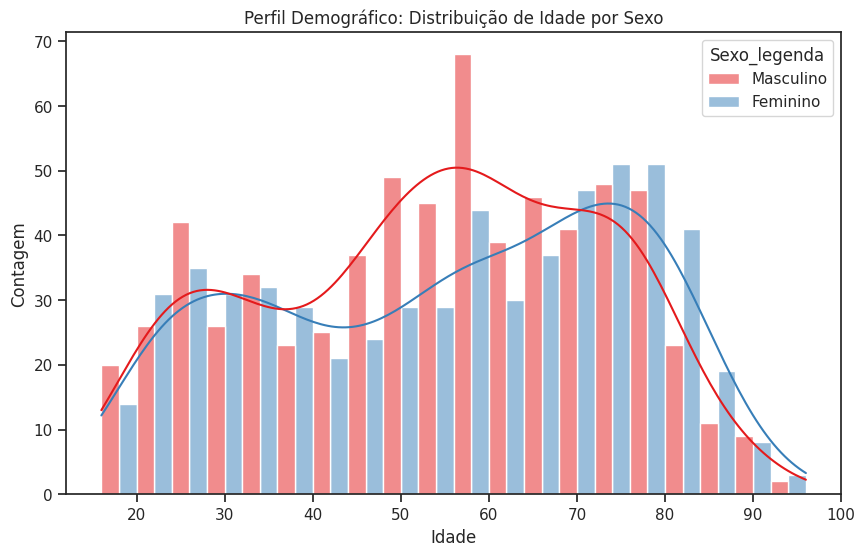

In [ ]:
# Gráfico 1.1: Distribuição de Idade por Sexo (Visualização Geral)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Sexo_legenda", multiple="dodge", bins=20, kde=True, palette="Set1")
plt.title("Perfil Demográfico: Distribuição de Idade por Sexo")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

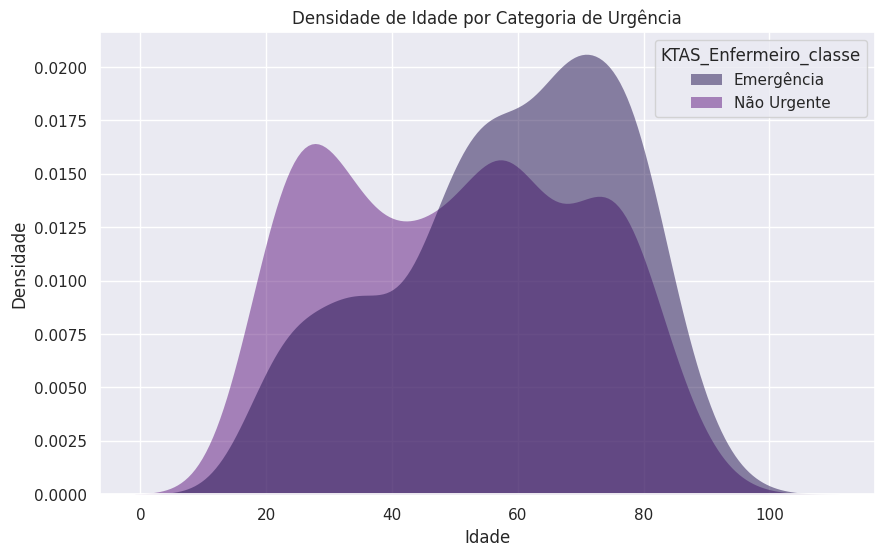

In [ ]:
# Gráfico 1.2: Densidade de Idade por Categoria de Urgência
sns.set_theme(style="darkgrid", palette="magma")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Age", hue="KTAS_Enfermeiro_classe", fill=True, common_norm=False, alpha=.5, linewidth=0)
plt.title("Densidade de Idade por Categoria de Urgência")
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.show()

> **Interpretação:**
> * **Perfil Geral:** O histograma mostra que a base de pacientes não é uniforme porque há maior concentração a partir dos 50 anos. Os gêneros estão, em sua maioria, balanceados por faixa etária, com discrepâncias pontuais na prevalência entre homens e mulheres; isso afasta a hipótese de viés de especialidade (ex.: hospital materno).

> * **Risco Etário (KDE):** O gráfico de densidade confirma um insight importante: as curvas das classes mais graves (KTAS 1–2) deslocam-se para a direita, com picos em idades mais avançadas (≥50 anos), enquanto as classes não-urgentes concentram-se na faixa dos 20–30 anos.

> * **Conclusão Analítica:** Os achados indicam que a idade é um preditor relevante de gravidade neste conjunto de dados: pacientes jovens tendem às categorias de menor risco; a população idosa predomina em ressuscitação e emergência. Há uma implicação operacional: maior alocação de recursos críticos, atenção ao fluxo de triagem e dimensionamento de equipes para atender a demanda geriátrica.

### 2. Quadro Clínico: Sinais Vitais e Estado Mental
A triagem avalia sinais objetivos e subjetivos. Analisamos Dor, Pressão Arterial e o Nível de Consciência.

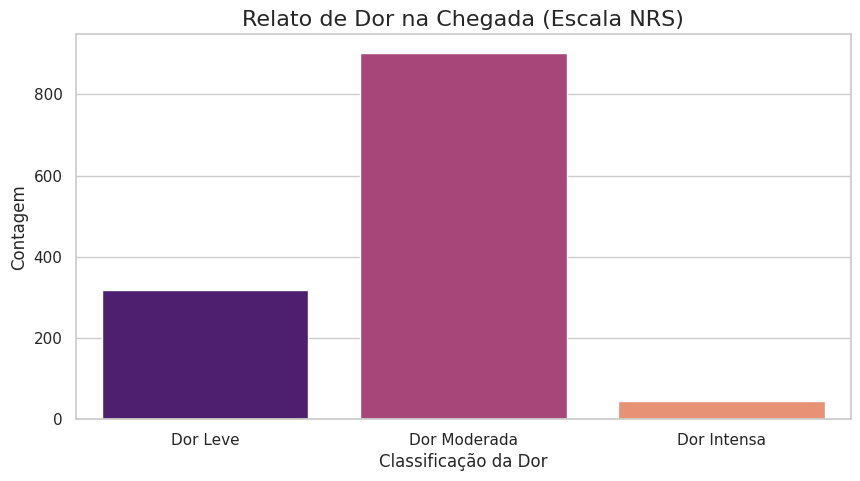

In [ ]:
# Gráfico 2.1: Intensidade da Dor
plt.figure(figsize=(10, 5))
ordem_dor = ["Sem Dor", "Dor Leve", "Dor Moderada", "Dor Intensa"]
# Filtro para evitar erro de categoria inexistente
ordem_dor = [x for x in ordem_dor if x in df['Dor_Nivel'].unique()]

sns.countplot(data=df, x="Dor_Nivel", hue="Dor_Nivel", order=ordem_dor, palette="magma", legend=False)
plt.title("Relato de Dor na Chegada (Escala NRS)", fontsize=16)
plt.xlabel("Classificação da Dor")
plt.ylabel("Contagem")
plt.show()

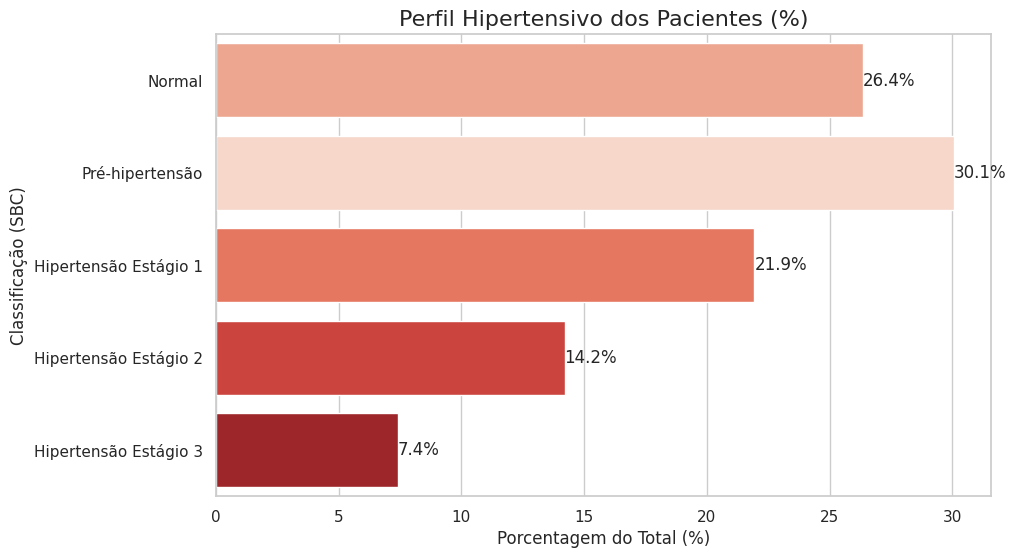

In [ ]:
# Gráfico 2.2: Saúde Cardiovascular (Pressão Arterial)
plt.figure(figsize=(10, 6))
# Calculando percentuais para melhor visualização
counts = df['Categoria_Pressao'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
counts.columns = ['Categoria_Pressao', 'Percent']
ordem_pressao = ["Normal", "Pré-hipertensão", "Hipertensão Estágio 1", "Hipertensão Estágio 2", "Hipertensão Estágio 3"]
ordem_pressao = [x for x in ordem_pressao if x in df['Categoria_Pressao'].unique()]

ax = sns.barplot(data=counts, y="Categoria_Pressao", x="Percent", order=ordem_pressao, palette="Reds", hue="Categoria_Pressao", legend=False)
plt.title("Perfil Hipertensivo dos Pacientes (%)", fontsize=16)
plt.xlabel("Porcentagem do Total (%)")
plt.ylabel("Classificação (SBC)")
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%')
plt.show()

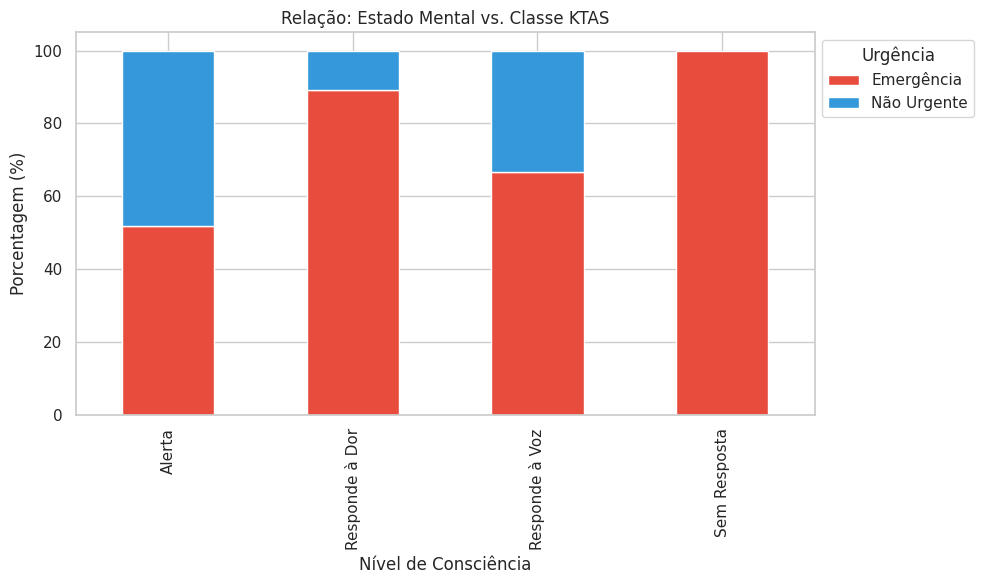

In [ ]:
# Gráfico 2.3: Estado Mental vs. Classe KTAS
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
tabela_mental_ktas = pd.crosstab(df['Estado_Mental_legenda'], df['KTAS_Enfermeiro_classe'], normalize='index') * 100
tabela_mental_ktas.plot(kind='bar', stacked=True, color=['#e74c3c', '#3498db'], ax=plt.gca())
plt.title("Relação: Estado Mental vs. Classe KTAS")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Nível de Consciência")
plt.legend(title="Urgência", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

> **Interpretação:**
> * **Subjetividade da Dor (Volume):** O gráfico de barras de intensidade da dor atua como um termômetro da demanda sintomática. Se a barra de "Dor Intensa" for predominante, indica que a busca pelo pronto-socorro é motivada por sofrimento agudo, o que pressiona a equipe por analgesia rápida. Por outro lado, se "Sem Dor" tiver representatividade relevante, aponta para uma demanda gerada por outros fatores (ex: ansiedade, mal-estar inespecífico ou burocracia/atestados), o que altera o fluxo de atendimento.

> * **Risco Silencioso (Hipertensão):** Ao normalizar os dados de pressão arterial para percentuais, o gráfico revela a carga de comorbidades da população atendida. A presença significativa de pacientes nas faixas de "Hipertensão Estágio 2" e "3" alerta para riscos cardiovasculares iminentes (como AVC ou IAM), independentemente da queixa principal. Isso sugere que a triagem não pode olhar apenas para a "dor", mas deve considerar os sinais vitais como gatilhos automáticos de prioridade.


> * **Preditores Neurológicos (Correlação Crítica):** As categorias de consciência alterada ou de alto risco devem estar quase 100% preenchidas pelas cores de alta urgência (KTAS 1 e 2), o que indica variáveis simbolicamente mais prioritárias em relação a outras.

### 3. Dinâmica Operacional: Chegada e Lotação
Como os pacientes chegam influencia sua gravidade? E a superlotação do hospital afeta a qualidade da decisão médica?

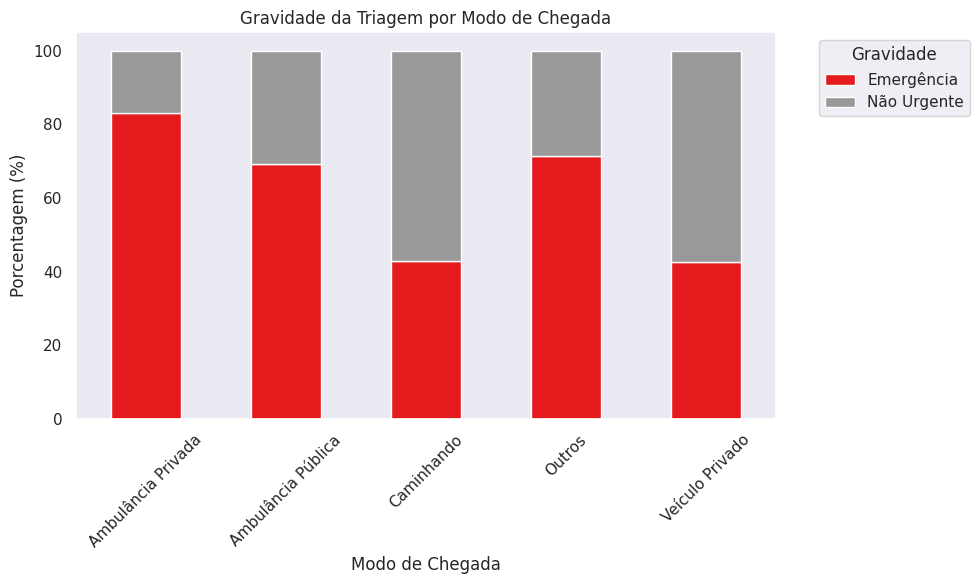

In [ ]:
# Gráfico 3.1: Gravidade por Modo de Chegada
sns.set_theme(style="dark")
plt.figure(figsize=(10, 6))
chegada_gravidade = pd.crosstab(df['Modo_Chegada_legenda'], df['KTAS_Enfermeiro_classe'], normalize='index') * 100
chegada_gravidade.plot(kind='bar', stacked=True, colormap='Set1', ax=plt.gca())
plt.title("Gravidade da Triagem por Modo de Chegada")
plt.xlabel("Modo de Chegada")
plt.ylabel("Porcentagem (%)")
plt.legend(title='Gravidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

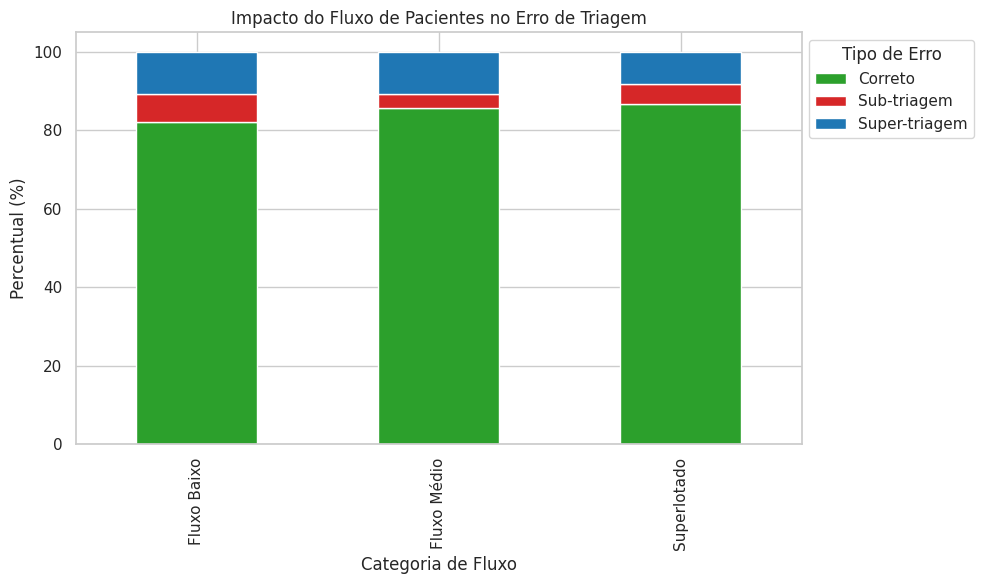

In [ ]:
# Gráfico 3.2: Impacto do Fluxo no Erro
tabela_fluxo_erro = pd.crosstab(df['Fluxo_Categoria'], df['Erro_Tipo_Triagem'], normalize='index') * 100
# Reordenar fluxo para lógica visual
ordem_fluxo = ["Fluxo Baixo", "Fluxo Médio", "Superlotado"]
ordem_fluxo = [x for x in ordem_fluxo if x in df['Fluxo_Categoria'].unique()]
tabela_fluxo_erro = tabela_fluxo_erro.reindex(ordem_fluxo)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
tabela_fluxo_erro.plot(kind='bar', stacked=True, color=['#2ca02c', '#d62728', '#1f77b4'], ax=plt.gca())
plt.title("Impacto do Fluxo de Pacientes no Erro de Triagem")
plt.ylabel("Percentual (%)")
plt.xlabel("Categoria de Fluxo")
plt.legend(title="Tipo de Erro", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

> **Interpretação:**
> * **Modo de Chegada:** O gráfico de barras revela uma forte correlação entre o meio de transporte e a gravidade do paciente. Observa-se que a chegada por ambulância (ou resgate) apresenta uma proporção significativamente maior de classificações de alta prioridade (KTAS 1 e 2) em comparação aos pacientes que chegam por meios próprios ou caminhando. Isso valida o "Modo de Chegada" como uma feature preditiva robusta para a triagem imediata.("Emergência") do que os que chegam caminhando ou em veículo próprio.

> * **Impacto da Lotação no Erro (Fluxo de Pacientes):** A visualização que cruza a categoria de fluxo com o tipo de erro de triagem mostra uma ironia do hospital. Ao comparar as barras, nota-se que a acurácia não cai com a superlotação, como seria esperado; pelo contrário. A proporção de erros (seja overtriage ou undertriage) é visualmente maior na categoria de "Fluxo Baixo". O gráfico sugere que a "flexibilidade operacional" ou a menor pressão de demanda acaba degradando a atenção e a acurácia da decisão clínica do enfermeiro, enquanto momentos de alta demanda parecem forçar um foco maior ou adesão mais estrita ao protocolo.

> * **Conclusão Analítica:** Os dados apontam para duas realidades distintas. Primeiro, o transporte pré-hospitalar funciona efetivamente como um filtro de gravidade. Segundo, e mais surpreendente, existe um paradoxo no hospital: o sistema de triagem torna-se menos confiável quando o hospital está vazio. Isso sugere que os erros não são fruto de burnout agudo ou pressa, mas talvez de subestimação do risco ou relaxamento de protocolo quando a equipe percebe que "tem tempo".

### 4. Auditoria KTAS: Acurácia da Enfermagem
Comparação direta entre a classificação realizada pela enfermeira na chegada e a classificação padrão-ouro do especialista.

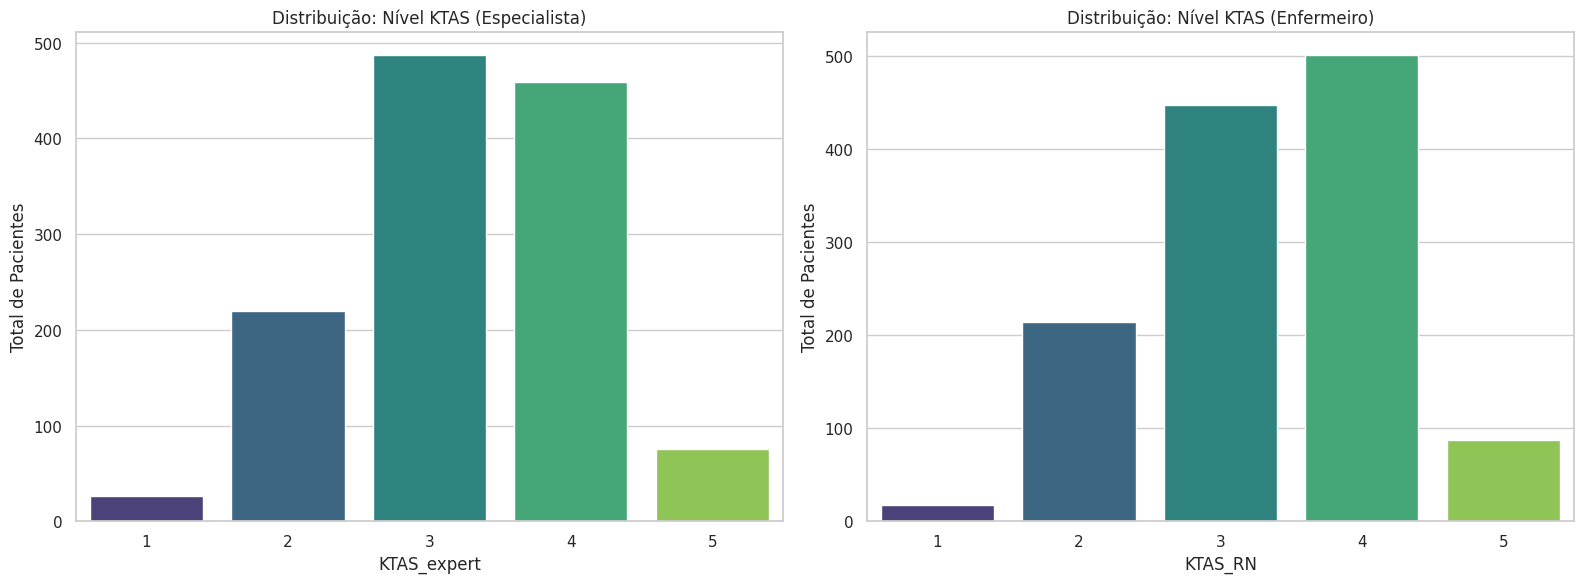

In [ ]:
# Gráfico 4.1: Visão Geral dos Níveis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Especialista
sns.countplot(data=df, x='KTAS_expert', palette='viridis', ax=axes[0])
axes[0].set_title("Distribuição: Nível KTAS (Especialista)")
axes[0].set_ylabel("Total de Pacientes")

# Enfermeiro
sns.countplot(data=df, x='KTAS_RN', palette='viridis', ax=axes[1])
axes[1].set_title("Distribuição: Nível KTAS (Enfermeiro)")
axes[1].set_ylabel("Total de Pacientes")

plt.tight_layout()
plt.show()

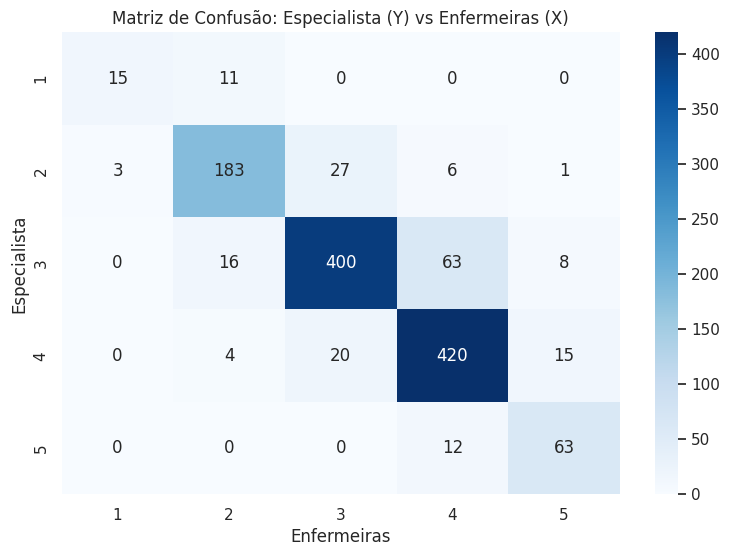

In [ ]:
# Gráfico 4.1: Heatmap de Acurácia
cm = pd.crosstab(df['KTAS_expert'], df['KTAS_RN'])
plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.title("Matriz de Confusão: Especialista (Y) vs Enfermeiras (X)")
plt.xlabel("Enfermeiras")
plt.ylabel("Especialista")
plt.show()

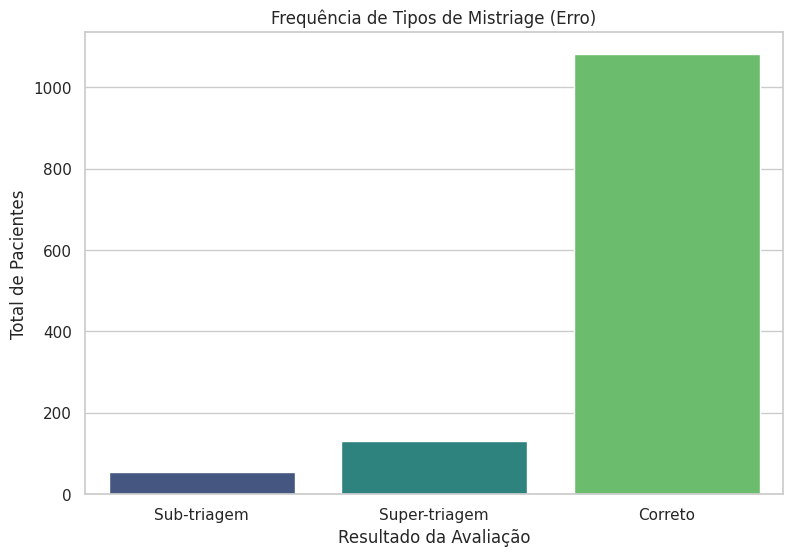

In [ ]:
# Gráfico 4.2: Frequência de Tipos de Mistriage
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Erro_Tipo_Triagem', palette='viridis')
plt.title("Frequência de Tipos de Mistriage (Erro)")
plt.xlabel("Resultado da Avaliação")
plt.ylabel("Total de Pacientes")
plt.show()

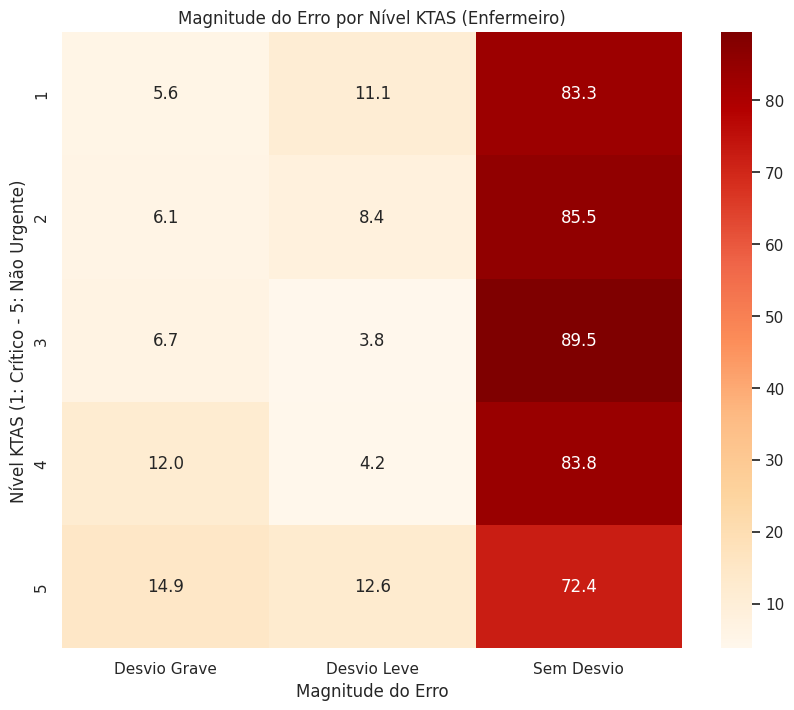

In [ ]:
# Gráfico 4.3: Magnitude do Erro por Nível
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 8))
# Usando KTAS_RN para ver onde a enfermeira erra mais
tabela_erro_ktas = pd.crosstab(df['KTAS_RN'], df['Erro_Desvio_Magnitude'], normalize='index') * 100
sns.heatmap(tabela_erro_ktas, annot=True, cmap="OrRd", fmt=".1f")
plt.title("Magnitude do Erro por Nível KTAS (Enfermeiro)")
plt.xlabel("Magnitude do Erro")
plt.ylabel("Nível KTAS (1: Crítico - 5: Não Urgente)")
plt.show()

> **Interpretação:**

> * **Matriz de Confusão:** O heatmap comparativo entre a classificação do Especialista e do Enfermeiro expõe a "zona de incerteza" do protocolo. A diagonal principal do gráfico mostra onde há acerto; contudo, a dispersão ao redor dela (manchas fora da diagonal) tende a ser maior nos níveis intermediários (KTAS 3). Isso indica que, enquanto casos óbvios (muito graves ou muito leves) são fáceis de classificar, a complexidade subjetiva do nível 3 gera ruído na decisão, sendo o ponto cego do processo de triagem.(Enfermeiro classificou como leve, mas Especialista disse que era grave).

> * **Viés Sistemático:** Ao analisar as barras de tipos de erro, define-se o perfil de segurança da equipe. Se a coluna de Overtriage (superestimativa) é dominante sobre o Undertriage (subestimativa), conclui-se que os enfermeiros adotam uma postura de "segurança defensiva": na dúvida, classificam como mais grave para garantir o atendimento. Embora isso sature o fluxo, é clinicamente preferível ao Undertriage, que representa o risco real de deixar um paciente grave na sala de espera.

> * **Magnitude do Desvio:** O último heatmap responde o quão grave é o erro quando ele acontece. O gráfico mostra que há erros acentuados nos extremos de níveis de triagem, em especial casos mais graves.

### 5. Desfechos Clínicos
Para onde os pacientes foram encaminhados e síntese das correlações.

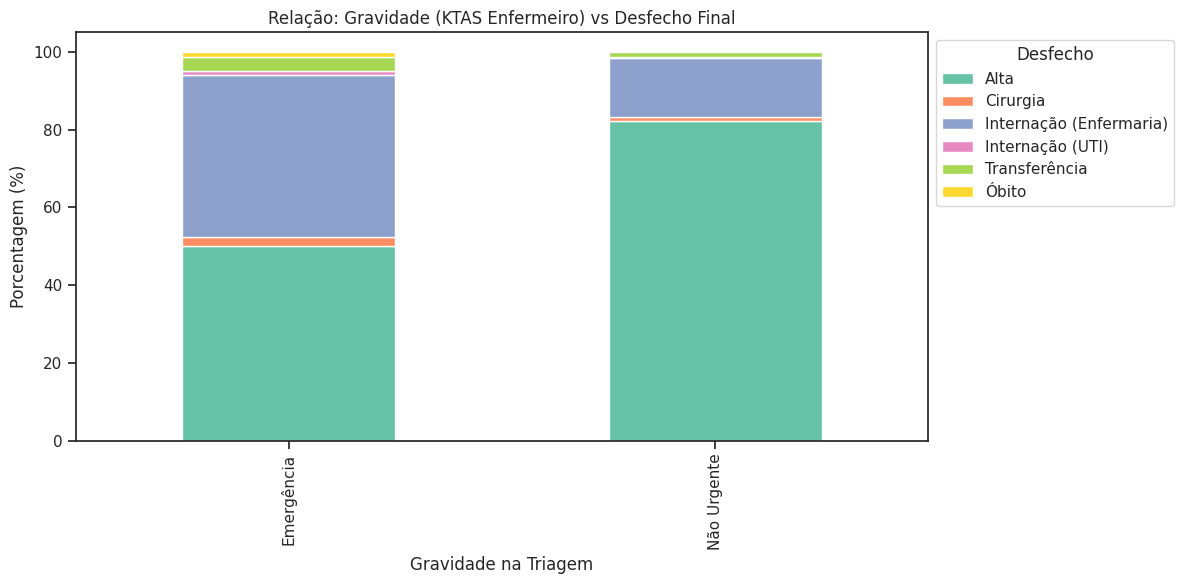

In [ ]:
# Gráfico 5.1: Destino do Paciente
sns.set_theme(style="ticks")
plt.figure(figsize=(12, 6))
tabela_ktas_desfecho = pd.crosstab(df['KTAS_Enfermeiro_classe'], df['Desfecho_legenda'], normalize='index') * 100
tabela_ktas_desfecho.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"), ax=plt.gca())
plt.title("Relação: Gravidade (KTAS Enfermeiro) vs Desfecho Final")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Gravidade na Triagem")
plt.legend(title="Desfecho", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

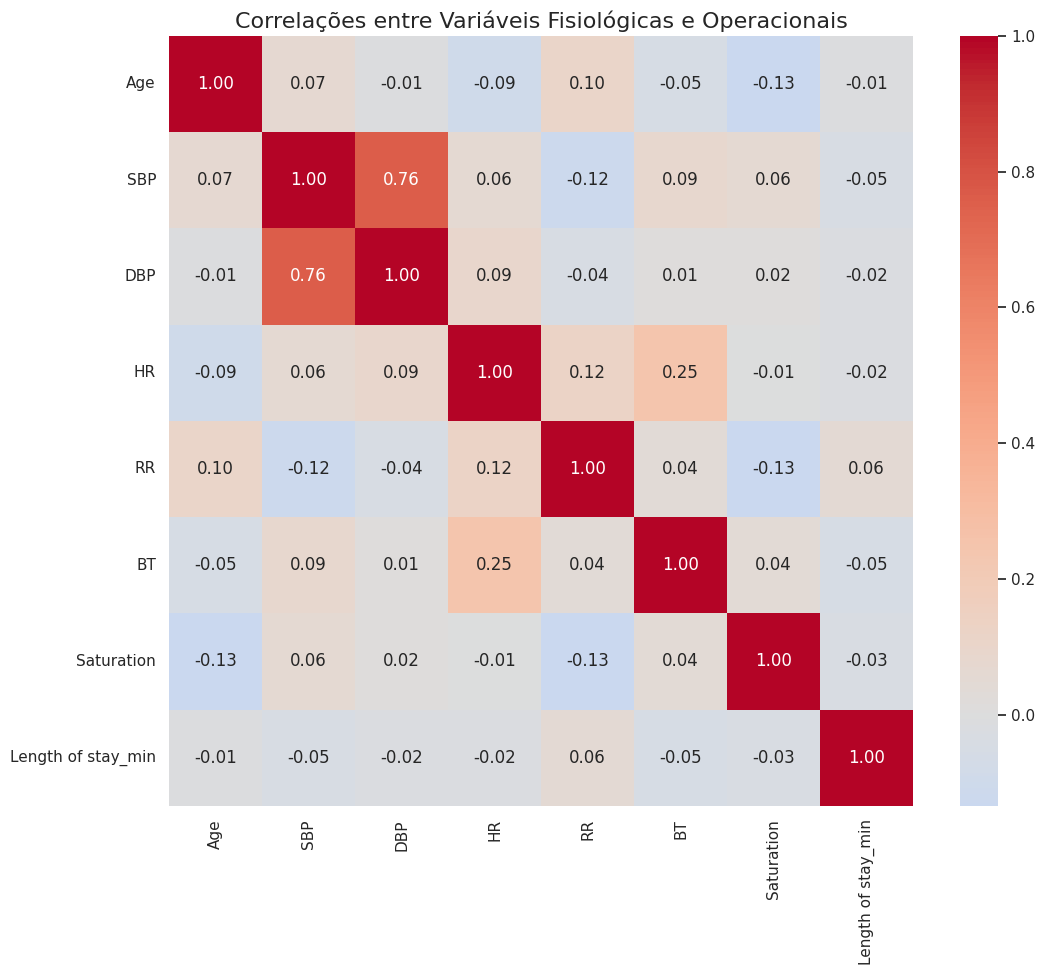

In [ ]:
# Gráfico 5.2: Mapa de Calor de Correlações (Resumo Geral)
plt.figure(figsize=(12, 10))
cols_num = ['Age', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation', 'Length of stay_min']
# Filtra colunas existentes
cols_existentes = [c for c in cols_num if c in df.columns]
corr = df[cols_existentes].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlações entre Variáveis Fisiológicas e Operacionais", fontsize=16)
plt.show()

> **Interpretação:**

> > * **Validação Preditiva:** O gráfico de barras conecta a decisão de entrada (Triagem) com o resultado de saída (Alta, Internação, Óbito/UTI). A distribuição visual confirma a eficácia do protocolo: observa-se um gradiente claro onde as categorias de maior gravidade (KTAS 1 e 2) apresentam taxas substancialmente maiores de admissão hospitalar e transferência para UTI, enquanto as categorias leves (KTAS 4 e 5) resultam majoritariamente em alta médica após consulta. Isso demonstra que o KTAS não apenas classifica a urgência temporal do atendimento, mas funciona como um preditor confiável da complexidade clínica e da necessidade de recursos hospitalares futuros.

> > * **Fisiologia (Correlações):** O mapa de calor demonstra sinais vitais associados intrinsicamente, mas em si, eles estão distribuídos de forma atômica.


## 5. Conclusão e Recomendações Estratégicas

A análise dos dados consolida três pilares fundamentais para a gestão clínica e operacional da unidade:

1.  **Preditores de Gravidade:** Valida-se a **idade e o modo de chegada** como indicadores robustos, exigindo alocação de recursos específicos para o fluxo de ambulâncias e o suporte ao paciente geriátrico.
2.  **Falha operacional contraditória:** O diagnóstico operacional revela que a taxa de erro de triagem aumenta, contra-intuitivamente, em momentos de **baixo fluxo**. Isso indica a necessidade urgente de reforço protocolar e supervisão ativa para combater a complacência técnica em períodos de menor demanda.
3.  **Eficácia do Sistema:** A alta concordância entre enfermeiros e especialistas, aliada à forte correlação com desfechos de internação e tempo de permanência, ratifica a **eficácia do sistema KTAS** não apenas como ferramenta de priorização de fila, mas como um indicador confiável de prognóstico clínico e previsão de ocupação hospitalar.